In [24]:
# Importing required Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [25]:
# Importing the data set
rent=pd.read_excel(r"C:\Users\srava\github projects\RFM Analysis\movie rental\film_database.xlsx")

In [26]:
rent.head() # gives top 5 rows

,Rental Date,Film Title,Genre,Film Length,Rating,Special Features,Cost,Customer First Name,Customer Last Name,Customer City,Customer District,Customer Country
0,2020-05-24 22:54:33,Freaky Pocus,Music,126,R,"Trailers, Behind the Scenes",2.99,Tommy,Collazo,Qomsheh,Esfahan,Iran
1,2020-05-24 23:03:39,Graduate Lord,Children,156,G,"Trailers, Behind the Scenes",2.99,Manuel,Murrell,Jaffna,Northern,Sri Lanka
2,2020-05-24 23:04:41,Love Suicides,Horror,181,R,"Trailers, Behind the Scenes",0.99,Andrew,Purdy,Baku,Baki,Azerbaijan
3,2020-05-24 23:05:21,Idols Snatchers,Children,84,NC-17,Trailers,2.99,Delores,Hansen,Jaroslavl,Jaroslavl,Russian Federation
4,2020-05-24 23:08:07,Mystic Truman,Comedy,92,NC-17,"Commentaries, Behind the Scenes",0.99,Nelson,Christenson,Santiago de Compostela,Galicia,Spain


In [27]:
rent.tail() # gives last 5 rows

,Rental Date,Film Title,Genre,Film Length,Rating,Special Features,Cost,Customer First Name,Customer Last Name,Customer City,Customer District,Customer Country
16039,2020-08-23 22:26:47,Voyage Legally,Classics,78,PG-13,"Commentaries, Behind the Scenes",0.99,Denise,Kelly,Rio Claro,Sao Paulo,Brazil
16040,2020-08-23 22:42:48,Illusion Amelie,Foreign,122,R,"Commentaries, Behind the Scenes",0.99,Grace,Ellis,Duisburg,Nordrhein-Westfalen,Germany
16041,2020-08-23 22:43:07,Hunchback Impossible,Drama,151,PG-13,"Trailers, Deleted Scenes",4.99,Gladys,Hamilton,Ilorin,Kwara & Kogi,Nigeria
16042,2020-08-23 22:50:12,Mob Duffel,Drama,105,G,Trailers,0.99,Philip,Causey,Korolev,Moskova,Russian Federation
16043,2020-05-24 22:53:30,Blanket Beverly,Family,148,G,Trailers,2.99,Charlotte,Hunter,guas Lindas de Gois,Gois,Brazil


In [28]:
rent.info()  # Infomation about data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16044 entries, 0 to 16043
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Rental Date          16044 non-null  datetime64[ns]
 1   Film Title           16044 non-null  object        
 2   Genre                16044 non-null  object        
 3   Film Length          16044 non-null  int64         
 4   Rating               16044 non-null  object        
 5   Special Features     16044 non-null  object        
 6   Cost                 16044 non-null  float64       
 7   Customer First Name  16044 non-null  object        
 8   Customer Last Name   16044 non-null  object        
 9   Customer City        16044 non-null  object        
 10  Customer District    15944 non-null  object        
 11  Customer Country     16044 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 1.5+ MB


In [29]:
# From above we get to know that there are null values in Customer District 

In [30]:
rent.isnull().sum().sort_values(ascending=False) # Checking for null values

Customer District      100
Rental Date              0
Film Title               0
Genre                    0
Film Length              0
Rating                   0
Special Features         0
Cost                     0
Customer First Name      0
Customer Last Name       0
Customer City            0
Customer Country         0
dtype: int64

In [31]:
# 100 null values are present in Customer District

In [32]:
rent['Customer District'].value_counts(dropna=False)
# Checking value counts

Customer District
Buenos Aires          276
California            252
West Bengali          243
Sao Paulo             237
Shandong              236
                     ... 
Kabol                  18
OHiggins               16
Basel-Stadt            14
Fujian                 14
Kujawsko-Pomorskie     12
Name: count, Length: 376, dtype: int64

In [33]:
# Filling null values with Buenos Aires as it has high number (mode)
rent['Customer District']=rent['Customer District'].fillna('Buenos Aires')

In [34]:
rent.isnull().sum().sort_values(ascending=False)
# all null got filled

Rental Date            0
Film Title             0
Genre                  0
Film Length            0
Rating                 0
Special Features       0
Cost                   0
Customer First Name    0
Customer Last Name     0
Customer City          0
Customer District      0
Customer Country       0
dtype: int64

In [35]:
# creating a new column called Name by using Customer First Name and Customer Last Name
rent['Name']=rent['Customer First Name']+rent['Customer Last Name']

In [36]:
rent.info() # New column is successfully added

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16044 entries, 0 to 16043
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Rental Date          16044 non-null  datetime64[ns]
 1   Film Title           16044 non-null  object        
 2   Genre                16044 non-null  object        
 3   Film Length          16044 non-null  int64         
 4   Rating               16044 non-null  object        
 5   Special Features     16044 non-null  object        
 6   Cost                 16044 non-null  float64       
 7   Customer First Name  16044 non-null  object        
 8   Customer Last Name   16044 non-null  object        
 9   Customer City        16044 non-null  object        
 10  Customer District    16044 non-null  object        
 11  Customer Country     16044 non-null  object        
 12  Name                 16044 non-null  object        
dtypes: datetime64[ns](1), float64(1

In [37]:
# Calculate Recency
from datetime import datetime
rent['Recency']=(datetime.now().date()-rent['Rental Date'].dt.date)/np.timedelta64(1,'D')

In [38]:
rent.Recency.describe()

count    16044.000000
mean      1259.157193
std         34.041277
min       1053.000000
25%       1234.000000
50%       1254.000000
75%       1275.000000
max       1319.000000
Name: Recency, dtype: float64

In [39]:
rent.Recency.head()

0    1319.0
1    1319.0
2    1319.0
3    1319.0
4    1319.0
Name: Recency, dtype: float64

In [40]:
rent.Recency.min() # minimum days

1053.0

In [41]:
rent.Recency.max() # maximum days

1319.0

In [42]:
# calculate Frequency (how frequent customer making purchase )
freq_df=rent.groupby('Name')['Film Title'].count().reset_index()

In [43]:
freq_df.head(5) # gives the no of Film titles made by customer according to Name

,Name,Film Title
0,AaronSelby,24
1,AdamGooch,22
2,AdrianClary,19
3,AgnesBishop,23
4,AlanKahn,26


In [44]:
# Renaming film title as Frequency
freq_df.rename(columns={'Film Title':'Frequency'},inplace=True)

In [45]:
freq_df.head(5) # column names is changed

,Name,Frequency
0,AaronSelby,24
1,AdamGooch,22
2,AdrianClary,19
3,AgnesBishop,23
4,AlanKahn,26


In [46]:
# Merging freq_df to rent
rent=rent.merge(freq_df,on='Name',how='left')

In [47]:
rent.head() # Frequency column is added

,Rental Date,Film Title,Genre,Film Length,Rating,Special Features,Cost,Customer First Name,Customer Last Name,Customer City,Customer District,Customer Country,Name,Recency,Frequency
0,2020-05-24 22:54:33,Freaky Pocus,Music,126,R,"Trailers, Behind the Scenes",2.99,Tommy,Collazo,Qomsheh,Esfahan,Iran,TommyCollazo,1319.0,38
1,2020-05-24 23:03:39,Graduate Lord,Children,156,G,"Trailers, Behind the Scenes",2.99,Manuel,Murrell,Jaffna,Northern,Sri Lanka,ManuelMurrell,1319.0,30
2,2020-05-24 23:04:41,Love Suicides,Horror,181,R,"Trailers, Behind the Scenes",0.99,Andrew,Purdy,Baku,Baki,Azerbaijan,AndrewPurdy,1319.0,27
3,2020-05-24 23:05:21,Idols Snatchers,Children,84,NC-17,Trailers,2.99,Delores,Hansen,Jaroslavl,Jaroslavl,Russian Federation,DeloresHansen,1319.0,21
4,2020-05-24 23:08:07,Mystic Truman,Comedy,92,NC-17,"Commentaries, Behind the Scenes",0.99,Nelson,Christenson,Santiago de Compostela,Galicia,Spain,NelsonChristenson,1319.0,20


In [48]:
rent.Frequency.value_counts(dropna=False) 
# value counts of frequency

Frequency
26    1378
30    1320
25    1250
28    1148
32    1120
27    1107
29    1044
23    1035
24     864
22     770
34     714
31     682
33     627
21     588
35     455
20     300
18     252
19     228
36     216
38     152
37     148
39     117
17      85
42      84
40      80
16      64
46      46
45      45
14      42
41      41
15      30
12      12
Name: count, dtype: int64

In [49]:
# calculate Monetary value (total amount spent by customer)
monetary=rent.groupby('Name')['Cost'].sum().reset_index()

In [50]:
monetary.head(5)

,Name,Cost
0,AaronSelby,85.76
1,AdamGooch,73.78
2,AdrianClary,50.81
3,AgnesBishop,74.77
4,AlanKahn,77.74


In [51]:
# Renaming cost as MonetaryValue
monetary.rename(columns={'Cost':'MonetaryValue'},inplace=True)

In [52]:
monetary.head(5) # column name changed

,Name,MonetaryValue
0,AaronSelby,85.76
1,AdamGooch,73.78
2,AdrianClary,50.81
3,AgnesBishop,74.77
4,AlanKahn,77.74


In [53]:
# Merging monetary with rent
rent=rent.merge(monetary,on='Name',how="left")

In [54]:
rent.head(5)# MonetaryValue column has been added

,Rental Date,Film Title,Genre,Film Length,Rating,Special Features,Cost,Customer First Name,Customer Last Name,Customer City,Customer District,Customer Country,Name,Recency,Frequency,MonetaryValue
0,2020-05-24 22:54:33,Freaky Pocus,Music,126,R,"Trailers, Behind the Scenes",2.99,Tommy,Collazo,Qomsheh,Esfahan,Iran,TommyCollazo,1319.0,38,131.62
1,2020-05-24 23:03:39,Graduate Lord,Children,156,G,"Trailers, Behind the Scenes",2.99,Manuel,Murrell,Jaffna,Northern,Sri Lanka,ManuelMurrell,1319.0,30,91.70
2,2020-05-24 23:04:41,Love Suicides,Horror,181,R,"Trailers, Behind the Scenes",0.99,Andrew,Purdy,Baku,Baki,Azerbaijan,AndrewPurdy,1319.0,27,72.73
3,2020-05-24 23:05:21,Idols Snatchers,Children,84,NC-17,Trailers,2.99,Delores,Hansen,Jaroslavl,Jaroslavl,Russian Federation,DeloresHansen,1319.0,21,50.79
4,2020-05-24 23:08:07,Mystic Truman,Comedy,92,NC-17,"Commentaries, Behind the Scenes",0.99,Nelson,Christenson,Santiago de Compostela,Galicia,Spain,NelsonChristenson,1319.0,20,61.80


In [55]:
# Define Scales for RFM Value or RFM Score
recency_scale=[5,4,3,2,1]
frequency_scale=[1,2,3,4,5]
monetary_scale=[1,2,3,4,5]

In [56]:
# Calculating Recency Scores
rent['RecencyScore']=pd.cut(rent.Recency,bins=5,labels=recency_scale)

In [57]:
rent.RecencyScore.value_counts(dropna=False)

RecencyScore
2    8942
1    6920
5     182
4       0
3       0
Name: count, dtype: int64

In [58]:
# Calculating Frequency Scores
rent['FrequencyScore']=pd.cut(rent.Frequency,bins=5,labels=frequency_scale)

In [59]:
rent.FrequencyScore.value_counts(dropna=False)

FrequencyScore
3    7799
2    5035
4    2429
1     485
5     296
Name: count, dtype: int64

In [60]:
# Calculating Monetary Scores
rent['MonetaryScore']=pd.cut(rent.MonetaryValue,bins=5,labels=monetary_scale)

In [61]:
rent.MonetaryScore.value_counts(dropna=False)

MonetaryScore
3    7696
2    5402
4    2303
1     394
5     249
Name: count, dtype: int64

In [62]:
rent.info() # scores are in category we need to change them into int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16044 entries, 0 to 16043
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Rental Date          16044 non-null  datetime64[ns]
 1   Film Title           16044 non-null  object        
 2   Genre                16044 non-null  object        
 3   Film Length          16044 non-null  int64         
 4   Rating               16044 non-null  object        
 5   Special Features     16044 non-null  object        
 6   Cost                 16044 non-null  float64       
 7   Customer First Name  16044 non-null  object        
 8   Customer Last Name   16044 non-null  object        
 9   Customer City        16044 non-null  object        
 10  Customer District    16044 non-null  object        
 11  Customer Country     16044 non-null  object        
 12  Name                 16044 non-null  object        
 13  Recency              16044 non-

In [63]:
# Chaging the data type as int 
rent.RecencyScore=rent.RecencyScore.astype(int)
rent.FrequencyScore=rent.FrequencyScore.astype(int)
rent.MonetaryScore=rent.MonetaryScore.astype(int)

In [64]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16044 entries, 0 to 16043
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Rental Date          16044 non-null  datetime64[ns]
 1   Film Title           16044 non-null  object        
 2   Genre                16044 non-null  object        
 3   Film Length          16044 non-null  int64         
 4   Rating               16044 non-null  object        
 5   Special Features     16044 non-null  object        
 6   Cost                 16044 non-null  float64       
 7   Customer First Name  16044 non-null  object        
 8   Customer Last Name   16044 non-null  object        
 9   Customer City        16044 non-null  object        
 10  Customer District    16044 non-null  object        
 11  Customer Country     16044 non-null  object        
 12  Name                 16044 non-null  object        
 13  Recency              16044 non-

In [65]:
# Calculating RFM Score based on Recency Score,Frequency Score,Monetary Score
rent['RFM_Score']=rent.RecencyScore+rent.FrequencyScore+rent.MonetaryScore

In [66]:
rent.RFM_Score.value_counts(dropna=False)

RFM_Score
7     3922
8     3746
6     3260
5     1744
9     1654
10     913
4      302
11     264
3      124
12      97
13      13
14       5
Name: count, dtype: int64

In [69]:
# Making them into segments based on RFM scores
rfm_segments=[]
for row in rent.RFM_Score:
    if row>=9:
        rfm_segments.append("Champions")
    elif row>=6:
        rfm_segments.append("Loyalists")
    elif row>=5:
        rfm_segments.append("At Risk")
    elif row>=4:
        rfm_segments.append("Can't Lose")
    else:
        rfm_segments.append("Lost")
rent['RFM_Segment']=rfm_segments

In [70]:
rent.RFM_Segment.value_counts(dropna=False)

RFM_Segment
Loyalists     10928
Champions      2946
At Risk        1744
Can't Lose      302
Lost            124
Name: count, dtype: int64

In [71]:
loyals=rent[rent.RFM_Segment=='Loyalists']

In [72]:
loyals[['Recency','Frequency','MonetaryValue']].describe()

,Recency,Frequency,MonetaryValue
count,10928.000000,10928.000000,10928.000000
mean,1259.611640,27.204795,79.701781
std,25.726774,3.374245,11.685879
min,1053.000000,17.000000,47.800000
25%,1233.000000,25.000000,70.730000
50%,1253.000000,27.000000,79.760000
75%,1275.000000,30.000000,88.710000
max,1319.000000,36.000000,111.680000


<Axes: >

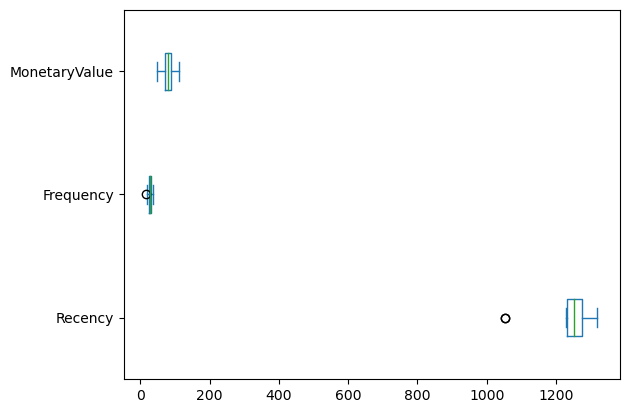

In [73]:
loyals[['Recency','Frequency','MonetaryValue']].plot(kind='box',vert=False)

In [74]:
# Top 20 Loyalists in different locations
pd.crosstab(rent['Customer City'],rent.RFM_Segment).nlargest(20,columns="Loyalists")

RFM_Segment,At Risk,Can't Lose,Champions,Lost,Loyalists
Customer City,,,,,
Aurora,0,0,2,0,48
London,9,0,2,0,37
Chandrapur,0,0,0,0,32
Charlotte Amalie,0,0,0,0,32
Daxian,0,0,1,0,32
Greensboro,0,0,0,0,32
Jamalpur,0,0,0,0,32
Jastrzebie-Zdrj,0,0,0,0,32
La Plata,0,0,0,0,32


In [75]:
# Top 20 Champions in different locations
pd.crosstab(rent['Customer City'],rent.RFM_Segment).nlargest(20,columns="Champions")

RFM_Segment,At Risk,Can't Lose,Champions,Lost,Loyalists
Customer City,,,,,
Saint-Denis,0,0,46,0,0
Cape Coral,0,0,45,0,0
Molodetno,0,0,42,0,0
Tanza,0,0,42,0,0
Changhwa,0,0,41,0,0
Changzhou,0,0,40,0,0
Ourense (Orense),0,0,40,0,0
Apeldoorn,0,0,39,0,0
Bijapur,0,0,39,0,0


In [42]:
# top 20 loyalist names
pd.crosstab(rent.Name,rent.RFM_Segment).nlargest(20,columns="Loyalists")

RFM_Segment,At Risk,Can't Lose,Champions,Lost,Loyalists
Name,,,,,
FrankWaggoner,0,0,0,0,32
GlendaFrazier,0,0,0,0,32
JavierElrod,0,0,0,0,32
JudithCox,0,0,1,0,32
JuliaFlores,0,0,0,0,32
LeroyBustamante,0,0,0,0,32
MarjorieTucker,0,0,0,0,32
MarySmith,0,0,0,0,32
MaxineSilva,0,0,0,0,32
